In [1]:
# url = 'https://github.com/jskeet?tab=overview&from=2008-12-01&to=2008-12-31'
url_with_years = {}
step = 2008
for year in range(2008, 2020):
    url_with_years[step]=f"https://github.com/jskeet?tab=overview&from={year}-12-01&to={year}-12-31"
    step+=1
from bs4 import BeautifulSoup as bs

In [2]:
url_with_years

{2008: 'https://github.com/jskeet?tab=overview&from=2008-12-01&to=2008-12-31',
 2009: 'https://github.com/jskeet?tab=overview&from=2009-12-01&to=2009-12-31',
 2010: 'https://github.com/jskeet?tab=overview&from=2010-12-01&to=2010-12-31',
 2011: 'https://github.com/jskeet?tab=overview&from=2011-12-01&to=2011-12-31',
 2012: 'https://github.com/jskeet?tab=overview&from=2012-12-01&to=2012-12-31',
 2013: 'https://github.com/jskeet?tab=overview&from=2013-12-01&to=2013-12-31',
 2014: 'https://github.com/jskeet?tab=overview&from=2014-12-01&to=2014-12-31',
 2015: 'https://github.com/jskeet?tab=overview&from=2015-12-01&to=2015-12-31',
 2016: 'https://github.com/jskeet?tab=overview&from=2016-12-01&to=2016-12-31',
 2017: 'https://github.com/jskeet?tab=overview&from=2017-12-01&to=2017-12-31',
 2018: 'https://github.com/jskeet?tab=overview&from=2018-12-01&to=2018-12-31',
 2019: 'https://github.com/jskeet?tab=overview&from=2019-12-01&to=2019-12-31'}

In [218]:
import urllib3
http = urllib3.PoolManager()
content = http.request("GET",'https://github.com/jskeet?tab=overview&from=2010-12-01&to=2010-12-31')

C:\Users\User\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [219]:
soup = bs(content.data)


In [222]:
yearly_data_soup = {x: None for x in range(2008,2020)}
for year,url in url_with_years.items():
    content = http.request("GET",url)
    souper = bs(content.data)
    yearly_data_soup[year] = souper.find("div",{"data-url":"/jskeet"}).find("g").contents

C:\Users\User\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\User\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\User\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\User\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS r

In [221]:
data_2007_2008 = soup.find("div",{"data-url":"/jskeet"}).find("g").contents
import re
def do_it_for_all(dorothy):
    pat = re.compile(r'data-count=\"[1-9]*\"')
    date = re.compile(r'\"\d*-\d*-\d*"')
    monthly_contribution = {x: 0 for x in range(1,13)}
    contri_adder = []
    cur_month = 0
    contrib = 0
    for data in dorothy:
        for i in data:
            if not isinstance(i.find("rect"),int) and re.findall(pat,str(i)):
                contrib = int("".join(re.findall("\d*",str((re.findall(pat,str(i)))))))
                month = int(re.findall(date,str(i))[0][6:8])
                cur_month = month
                monthly_contribution[month]+=contrib
    return monthly_contribution
    
# print(do_it_for_all(url_with_years[3]))            
        
print(do_it_for_all(data_2007_2008))


{1: 1, 2: 40, 3: 2, 4: 7, 5: 12, 6: 9, 7: 4, 8: 0, 9: 3, 10: 45, 11: 25, 12: 74}


In [225]:
final_count = {x:None for x in range(2008,2020)}
for year, data in yearly_data_soup.items():
    final_count[year] = do_it_for_all(data)

In [3]:
import pickle
import redis

r = redis.StrictRedis('localhost')
p_mydict = pickle.dumps(final_count)
r.set('final_data_jon_skeet',p_mydict)

In [202]:
read_dict = r.get('yearly_data_soup')

In [203]:
my_dict = pickle.loads(read_dict)

In [4]:
in_cache = r.get('final_data_jon_skeet')
finall = pickle.loads(in_cache)
finall

{2008: {1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 0,
  7: 1,
  8: 162,
  9: 14,
  10: 8,
  11: 10,
  12: 4},
 2009: {1: 20,
  2: 18,
  3: 12,
  4: 2,
  5: 14,
  6: 34,
  7: 0,
  8: 1,
  9: 4,
  10: 0,
  11: 76,
  12: 23},
 2010: {1: 1,
  2: 40,
  3: 2,
  4: 7,
  5: 12,
  6: 9,
  7: 4,
  8: 0,
  9: 3,
  10: 45,
  11: 25,
  12: 74},
 2011: {1: 83,
  2: 3,
  3: 5,
  4: 16,
  5: 25,
  6: 0,
  7: 91,
  8: 88,
  9: 88,
  10: 79,
  11: 31,
  12: 3},
 2012: {1: 45,
  2: 109,
  3: 65,
  4: 51,
  5: 8,
  6: 30,
  7: 51,
  8: 13,
  9: 1,
  10: 36,
  11: 37,
  12: 28},
 2013: {1: 63,
  2: 31,
  3: 79,
  4: 96,
  5: 8,
  6: 101,
  7: 72,
  8: 10,
  9: 9,
  10: 5,
  11: 70,
  12: 7},
 2014: {1: 17,
  2: 10,
  3: 43,
  4: 51,
  5: 14,
  6: 96,
  7: 138,
  8: 84,
  9: 17,
  10: 7,
  11: 18,
  12: 14},
 2015: {1: 35,
  2: 18,
  3: 73,
  4: 41,
  5: 27,
  6: 93,
  7: 137,
  8: 88,
  9: 32,
  10: 40,
  11: 115,
  12: 99},
 2016: {1: 105,
  2: 123,
  3: 99,
  4: 242,
  5: 253,
  6: 159,
  7: 219,
  8: 95

In [5]:
import pandas as pd
new_dict = {}

for k,v in finall.items():
    summer = 0
    for j in v.values():
        summer+=j
    new_dict[k] = summer

In [6]:
new_dict.values()

dict_values([199, 204, 222, 512, 474, 551, 509, 798, 2013, 2528, 2030, 2596])

In [19]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
df=pd.DataFrame({'x': range(2008,2020), 'y':list(new_dict.values()), 'group':list(new_dict.values())})
df

,x,y,group
0,2008,199,199
1,2009,204,204
2,2010,222,222
3,2011,512,512
4,2012,474,474
5,2013,551,551
6,2014,509,509
7,2015,798,798
8,2016,2013,2013
9,2017,2528,2528


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """Entry point for launching an IPython kernel.


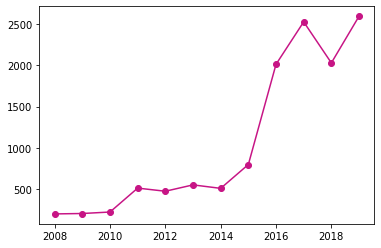

In [29]:
plt.plot( 'x', 'y', data=df, marker='o', color='mediumvioletred')


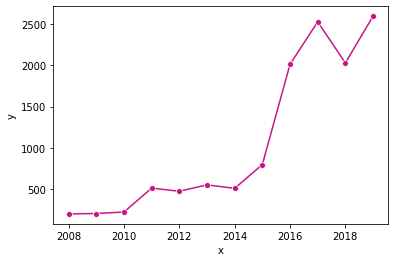

In [21]:
import seaborn as sns
g = sns.lineplot( 'x', 'y', data=df, marker='o', color='mediumvioletred')



In [13]:
?sns.lineplot

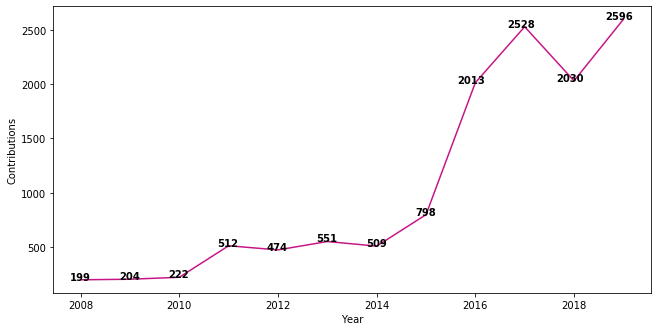

In [62]:
fig, ax = plt.subplots(figsize=(10.7, 5.27))
p1=sns.lineplot(ax = ax, data=df, x="x", y="y", color="mediumvioletred")

for line in range(0,df.shape[0]):
     p1.text(df.x[line]+0.2, df.y[line], df.group[line], horizontalalignment='right', size='medium', color='black', weight='semibold')
p1.set(xlabel='Year', ylabel='Contributions')
fig = p1.get_figure()
# savefig("ouput.png")

In [65]:
# dir(p1)
fig.savefig("jon_skeet.png")